In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
train = pd.read_csv('train.csv')

In [140]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [142]:
train.drop(['Alley'], axis=1, inplace=True)
train.drop(['FireplaceQu'], axis=1, inplace=True)
train.drop(['PoolQC'], axis=1, inplace=True)
train.drop(['Fence'], axis=1, inplace=True)
train.drop(['MiscFeature'], axis=1, inplace=True)

In [143]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

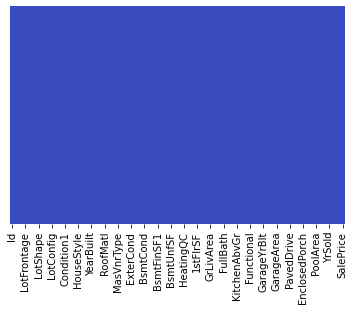

In [145]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [146]:
def one_hot_encoding(final_df,multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:     
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)      
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
               
    df_final=pd.concat([final_df,df_final],axis=1)        
    return df_final

In [147]:
cat_columns = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
               'Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition2','BldgType','Condition1','HouseStyle','SaleType',
               'SaleCondition','Foundation',
               'BsmtExposure','BsmtFinType1','BsmtFinType2',
               'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
               'MasVnrType','Heating','CentralAir','Electrical',
               'Functional','GarageType',
               'GarageFinish','PavedDrive']

In [148]:
train = one_hot_encoding(train, cat_columns)

MSSubClass
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
Foundation
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
CentralAir
Electrical
Functional
GarageType
GarageFinish
PavedDrive


In [149]:
qual_columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
                'HeatingQC','KitchenQual','GarageQual','GarageCond']

In [150]:
def get_int_qual(df, qual_columns):
    df_temp = df.copy()
    for col in qual_columns:
        df_temp.loc[df_temp[col] == 'Ex', col] = 5
        df_temp.loc[df_temp[col] == 'Gd', col] = 4
        df_temp.loc[df_temp[col] == 'TA', col] = 3
        df_temp.loc[df_temp[col] == 'Fa', col] = 2
        df_temp.loc[df_temp[col] == 'Po', col] = 1
        df_temp.loc[df_temp[col] == 'NA', col] = 0
        df_temp[col] = df_temp[col].astype(int)
    return df_temp

In [151]:
train = get_int_qual(train, qual_columns)

In [152]:
train.drop(['Id'], axis=1, inplace=True)

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, LotFrontage to Y
dtypes: float64(3), int32(8), int64(33), uint8(182)
memory usage: 715.9 KB


In [154]:
pd.set_option('display.max_rows', None)

In [155]:
train.columns

Index([ 'LotFrontage',      'LotArea',  'OverallQual',  'OverallCond',
          'YearBuilt', 'YearRemodAdd',   'MasVnrArea',    'ExterQual',
          'ExterCond',     'BsmtQual',
       ...
                'Typ',       'Attchd',      'Basment',      'BuiltIn',
            'CarPort',       'Detchd',          'RFn',          'Unf',
                  'P',            'Y'],
      dtype='object', length=226)

In [156]:
norm_cols = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','YearBuilt','YearRemodAdd',
            'GarageYrBlt', 'YrSold']


In [157]:
def normalise(df, cols):
    for col in cols:
        df[col] = (df[col] - df[col].mean())/df[col].var()
    return df

In [158]:
train = normalise(train, norm_cols)

In [159]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,P,Y
count,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1460.00000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.825024e-17,-6.534917e-21,6.099315,5.575342,3.467546e-17,2.165695e-16,-1.330747e-19,3.39589,3.083562,3.565068,...,0.931507,0.65137,0.013014,0.060274,0.006164,0.265068,0.289041,0.469863,0.020548,0.917808
std,4.540497e-02,1.001877e-04,1.382997,1.112799,3.310940e-02,4.843692e-02,5.538046e-03,0.57428,0.351054,0.678071,...,0.252677,0.47670,0.113372,0.238075,0.078298,0.441521,0.453472,0.499262,0.141914,0.274751
min,-1.011219e-01,-9.251461e-05,1.000000,1.000000,-1.088206e-01,-8.179979e-02,-3.180022e-03,2.00000,1.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.071910e-02,-2.974463e-05,5.000000,5.000000,-1.892953e-02,-4.191548e-02,-3.180022e-03,3.00000,3.000000,3.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.929725e-17,-1.042230e-05,6.000000,5.000000,1.898885e-03,2.143018e-02,-3.180022e-03,3.00000,3.000000,4.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.845150e-02,1.088748e-05,7.000000,6.000000,3.149716e-02,4.489154e-02,1.857518e-03,4.00000,3.000000,4.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.008685e-01,2.054975e-03,10.000000,9.000000,4.245948e-02,5.896835e-02,4.589190e-02,5.00000,5.000000,5.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
train = train.loc[:,~train.columns.duplicated()]

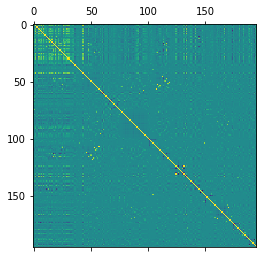

In [161]:
corrMatrix = train.corr()
plt.matshow(corrMatrix)
plt.show()

In [162]:
for i in range(len(corrMatrix)):
    for j in range(len(corrMatrix)):
        if ((corrMatrix.iloc[i,j]>0.95) & (i!=j)):
            print(i)
            print(j)

53
108
57
107
107
57
108
53
124
131
131
124
160
170
170
160


In [163]:
train.drop([train.columns[108]], axis=1, inplace=True)
train.drop([train.columns[107]], axis=1, inplace=True)
train.drop([train.columns[131]], axis=1, inplace=True)
train.drop([train.columns[170]], axis=1, inplace=True)

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 191 entries, LotFrontage to P
dtypes: float64(22), int32(8), int64(14), uint8(147)
memory usage: 666.0 KB
